In [193]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [194]:
#Importar data
df = pd.read_csv("data.csv")
print(df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  ...  Unnamed: 991  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0  ...           NaN   
1  179    0.13  202.27    23.27   4.1          1.0  1.0  ...           NaN   
2   68    0.12   76.16     8.16   4.4          1.0  1.0  ...           NaN   
3  175    0.12  196.00    21.00   3.8          1.0  1.0  ...           NaN   
4   38    0.09   41.42     3.42   4.1          1.0  1.0  ...           NaN   

   Unnamed: 992  Unnamed: 993  Unnamed: 994 

C:\Users\acer\AppData\Local\Temp\ipykernel_6140\1757755306.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [195]:

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)


            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

In [196]:
new_df.shape


(1472, 13)

In [197]:
print(new_df.head())


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  Normal  Oily  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0     1.0   1.0   
1  179    0.13  202.27    23.27   4.1          1.0  1.0     1.0   1.0   
2   68    0.12   76.16     8.16   4.4          1.0  1.0     1.0   1.0   
3  175    0.12  196.00    21.00   3.8          1.0  1.0     1.0   1.0   
4   38    0.09   41.42     3.42   4.1          1.0  1.0     1.0   1.0   

   Sensitive  
0        1.0  
1        1.0  
2        0.0  
3        1.0  

In [198]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv("data.csv")

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)

            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

C:\Users\acer\AppData\Local\Temp\ipykernel_6140\2774417821.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [199]:
# Revisamos los tipos de variables que se encuentran en el data frame 
data_types = new_df.dtypes

print("Tipos de datos de las columnas:")
print(data_types)


Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue         object
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


In [200]:
#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
#  # Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Revenue'] = new_df['Revenue'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Revenue'] = pd.to_numeric(new_df['Revenue'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Revenue'] = new_df['Revenue'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


In [201]:
#Al ravisar la data, nos damos cuenta que la variable "Cost" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
# Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Cost'] = new_df['Cost'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Cost'] = pd.to_numeric(new_df['Cost'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Cost'] = new_df['Cost'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost           float64
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


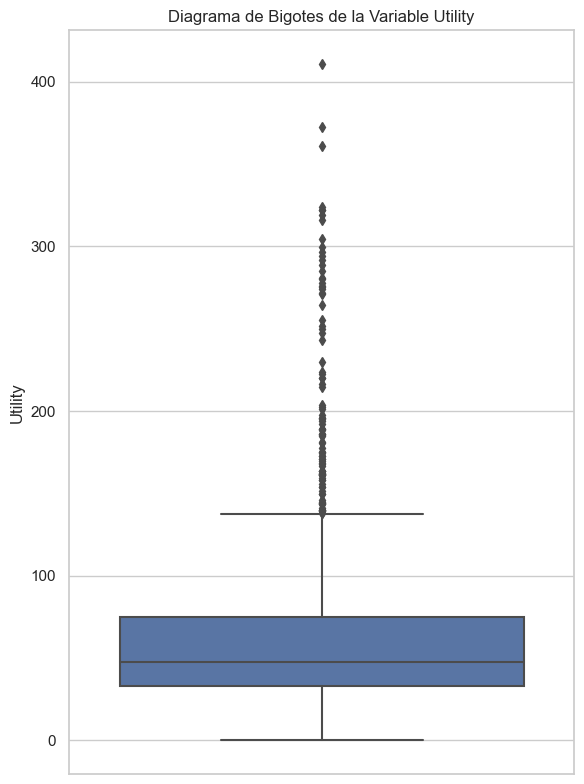

In [202]:
#Boxplot Utility
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Utility'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Utility' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Utility')
plt.ylabel('Utility')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


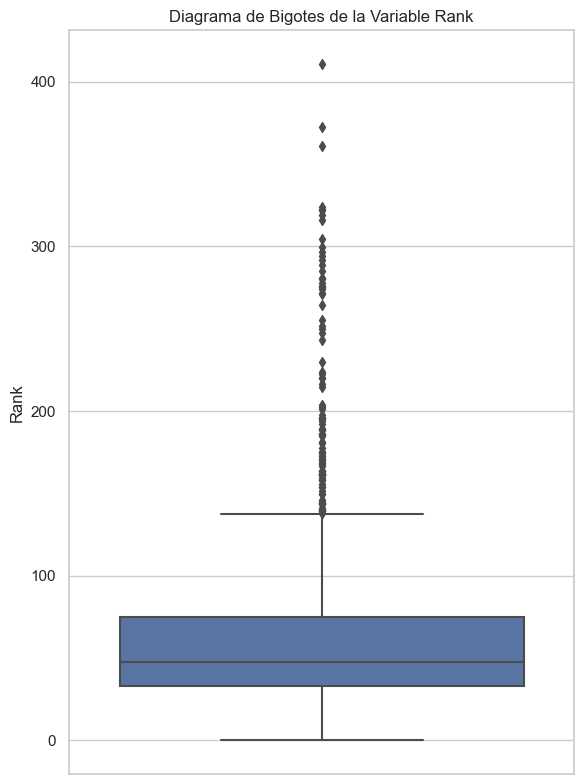

In [203]:
#Boxplot Rank
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Rank'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Rank' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Rank')
plt.ylabel('Rank')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


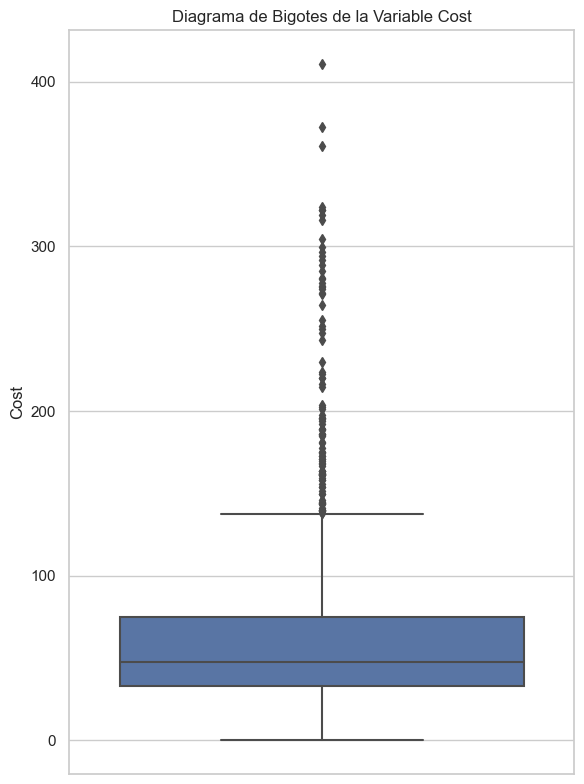

In [204]:
#Boxplot Cost
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Cost'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Cost' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Cost')
plt.ylabel('Cost')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


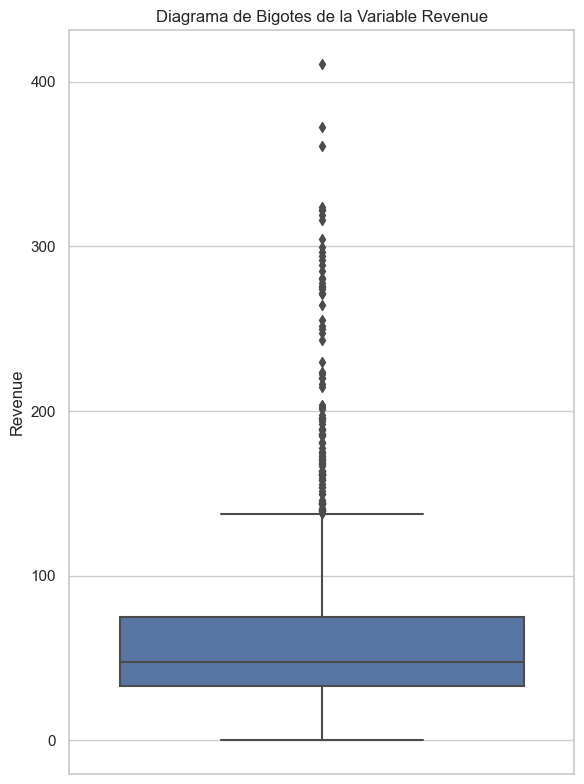

In [205]:
#Boxplot Revenue
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Revenue'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Revenue' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Revenue')
plt.ylabel('Revenue')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()

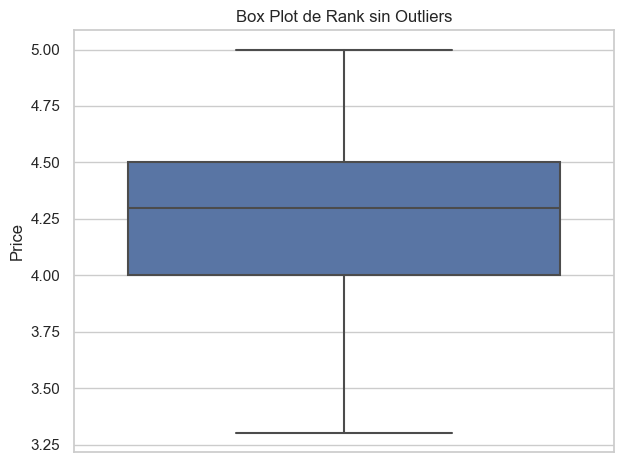

In [206]:
#'Rank' eliminación de outliers
rank_data = new_df['Rank']

# Calcular el IQR
Q1 = np.percentile(rank_data, 25)
Q3 = np.percentile(rank_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_rank_data = rank_data[(rank_data >= lower_bound) & (rank_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_rank_data)
plt.title('Box Plot de Rank sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [207]:

# Eliminamos los valores nulos de la variable "Revenue"
new_df = new_df.dropna(subset=['Revenue'])

# Verificar que los valores nulos han sido eliminados
print(new_df['Revenue'].isnull().sum())  # Muestra  0

0


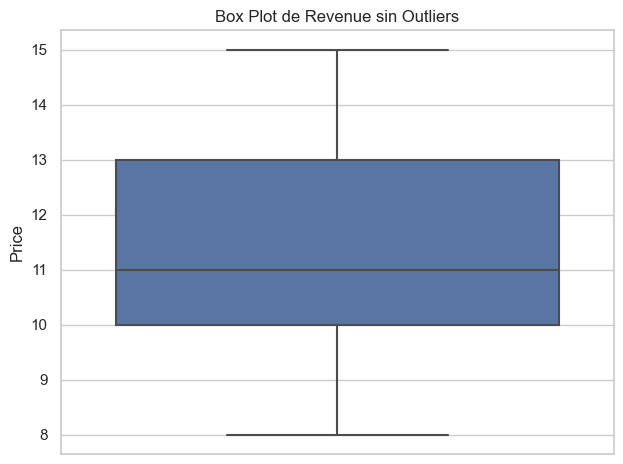

In [208]:
#'Revenue' eliminación de outliers
revenue_data = new_df['Revenue']

# Calcular el IQR
Q1 = np.percentile(revenue_data, 25)
Q3 = np.percentile(revenue_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_revenue_data = revenue_data[(revenue_data >= lower_bound) & (revenue_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_revenue_data)
plt.title('Box Plot de Revenue sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



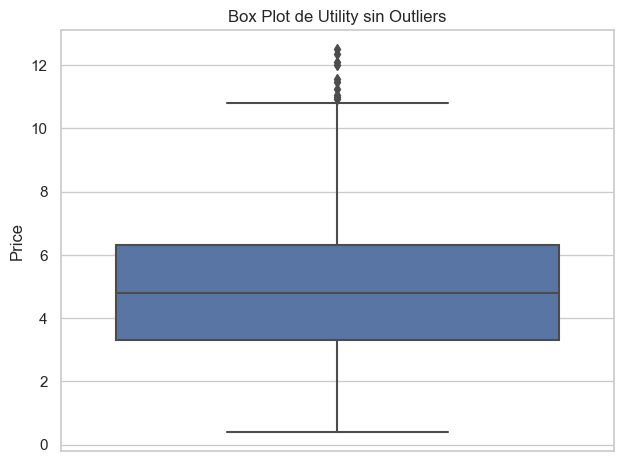

In [209]:
#'Utility' eliminación de outliers
utility_data = new_df['Utility']

# Calcular el IQR
Q1 = np.percentile(utility_data, 25)
Q3 = np.percentile(utility_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_utility_data = utility_data[(utility_data >= lower_bound) & (utility_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_utility_data)
plt.title('Box Plot de Utility sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [210]:

# Eliminamos los valores nulos de la variable "Cost"
new_df = new_df.dropna(subset=['Cost'])

# Verificar que los valores nulos han sido eliminados
print(new_df['Cost'].isnull().sum())  # Muestra  0

0


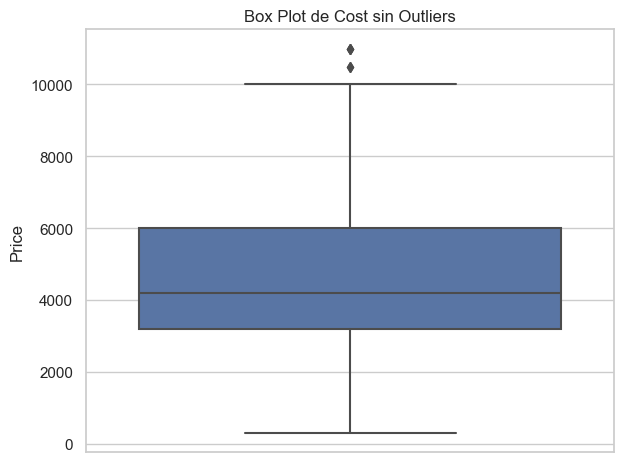

In [211]:

#'Cost' eliminación de outliers
cost_data = new_df['Cost']

# Calcular el IQR
Q1 = np.percentile(cost_data, 25)
Q3 = np.percentile(cost_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_cost_data = cost_data[(cost_data >= lower_bound) & (cost_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_cost_data)
plt.title('Box Plot de Cost sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

<Axes: xlabel='Label', ylabel='count'>

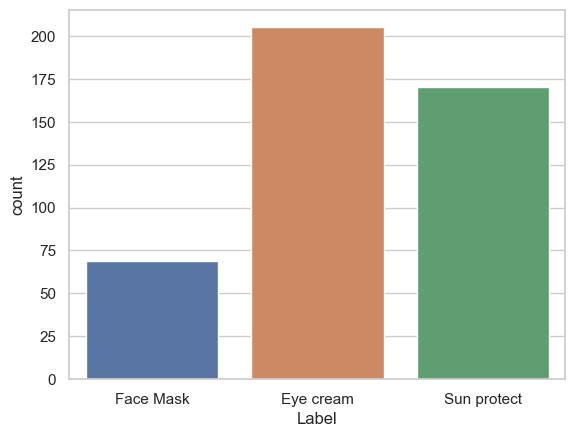

In [212]:
#Graficamos la varibale "Label" con el fin de identificar la cantidad de categorias.
sns.countplot(x="Label", data=new_df)

Luego de ver que esta variable tiene pocas categorias, 6 en total, convertimos esas variables en variables dummies, para que hagan parte de la regresion lineal.

In [213]:

dummies_l = pd.get_dummies(df['Label'], prefix='Label', drop_first=True)

# Concatenar las columnas dummies al DataFrame original
new_df = pd.concat([new_df, dummies_l], axis=1)

# Mostrar las primeras filas del DataFrame con las nuevas columnas dummies
print(new_df.head())


          Label      Brand                                      Name    Cost  \
1024  Face Mask       DIOR   Hydra Life Extra Plump Smooth Balm Mask  6900.0   
1025  Face Mask  DR. JART+   Dermask Micro Jet Brightening Solution™   900.0   
1026  Face Mask  DR. JART+     Dermask Intra Jet Wrinkless Solution™   900.0   
1027  Face Mask     BLITHE  Energy Yellow Citrus & Honey Splash Mask  4500.0   
1028  Face Mask    LANCÔME                           Rose Jelly Mask  3500.0   

      Revenue  Price  Utility  Rank  Combination  Dry  Normal  Oily  \
1024     14.0  78.66     9.66   4.6          1.0  1.0     1.0   0.0   
1025     12.0  10.08     1.08   4.0          1.0  1.0     1.0   1.0   
1026     10.0   9.90     0.90   3.9          1.0  1.0     1.0   1.0   
1027      9.0  49.05     4.05   4.2          1.0  1.0     1.0   0.0   
1028     14.0  39.90     4.90   4.1          1.0  1.0     1.0   1.0   

      Sensitive  Label_Eye cream  Label_Face Mask  Label_Moisturizer  \
1024        0.0     

<Axes: xlabel='Brand', ylabel='count'>

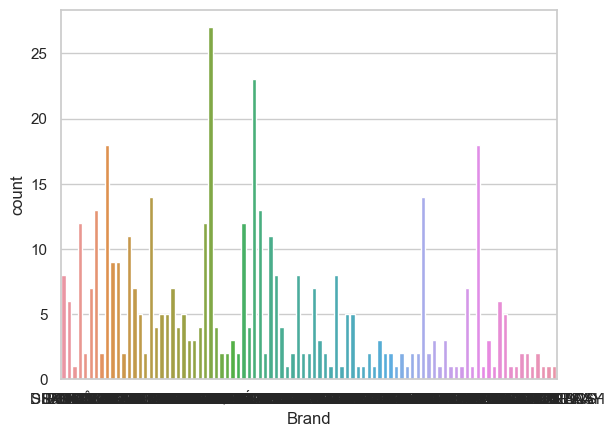

In [214]:
#Graficamos la varibale "Label" con el fin de identificar la cantidad de categorias.
sns.countplot(x="Brand", data=new_df)

Al graficar nos damos cuenta que la variable "Brand" cuenta con muchas categorias, por lo cual decidimos no usarla en la regresion.


In [216]:
new_df.shape

(1472, 18)